# Oasis InfoByte : Data Science Tasks

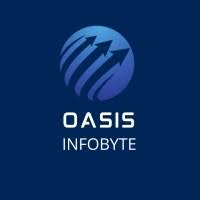

## Task 5 - SALES PREDICTION USING PYTHON

Target: From the Given Dataset, 

## Author : Mohamed Sherif El-Boraie

### Imported Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import plotly
import plotly.express as px



from sklearn.linear_model import  LinearRegression , Lasso , Ridge
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import  mean_absolute_error , r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# Warnings
import warnings
warnings.filterwarnings('ignore')

### Load and Explore Dataset

In [2]:
dataset = pd.read_csv('D:/Mohamed Sheriff/Projects/Git Projects/OIBSIP/Task 5 - SALES PREDICTION USING PYTHON/Dataset/Advertising.csv')

In [3]:
df = dataset.copy()
df.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
df = df.drop('Unnamed: 0' , axis=1)

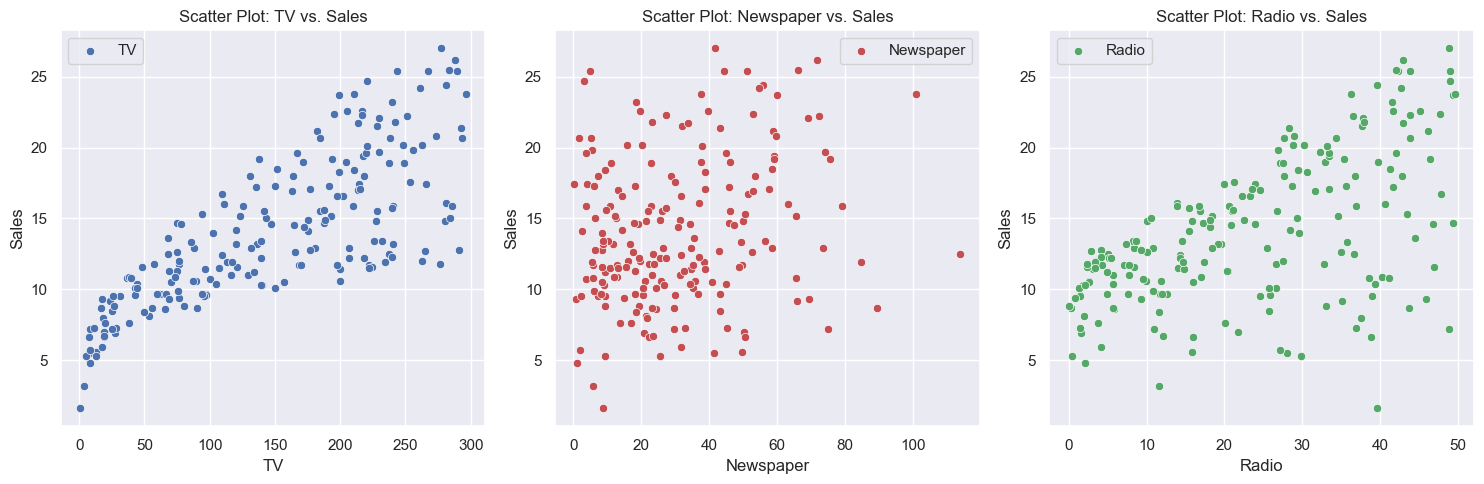

In [8]:
# Create a figure and set the size
plt.figure(figsize=(15, 5))

# Scatter plot for TV
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='TV', y='Sales', label='TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot: TV vs. Sales')
plt.legend()

# Scatter plot for Newspaper
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Newspaper', y='Sales', label='Newspaper', color='r')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter Plot: Newspaper vs. Sales')
plt.legend()

# Scatter plot for Radio
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Radio', y='Sales', label='Radio', color='g')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot: Radio vs. Sales')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

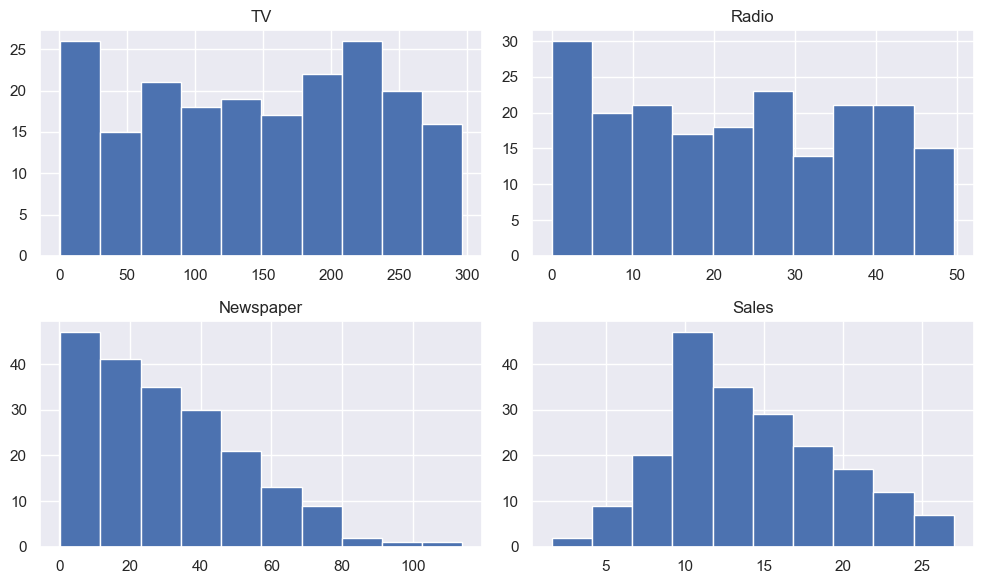

In [9]:
sns.set()
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

### Train Test Split

In [10]:
inputs = df.drop('Sales', axis=1)
targets = df['Sales']

In [11]:
x_train, x_test , y_train , y_test = train_test_split(inputs, targets , test_size=0.2, random_state=365)

In [12]:
target_names=['0', '1', '2']

Training and evaluating Linear Regression
--- Linear Regression ---
Testing Data:
Mean Absolute Error: 1.2326243555445433
Root Mean Squared Error: 1.5309339381228313
R2 Score: 0.8976354433192075


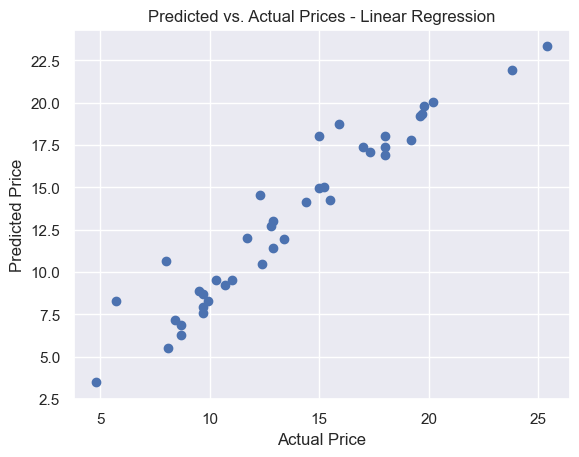

Best Model:LinearRegression()
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
Mean Absolute Error: 0.6526249999999993
Root Mean Squared Error: 0.8886836754436288
R2 Score: 0.9655069884705183


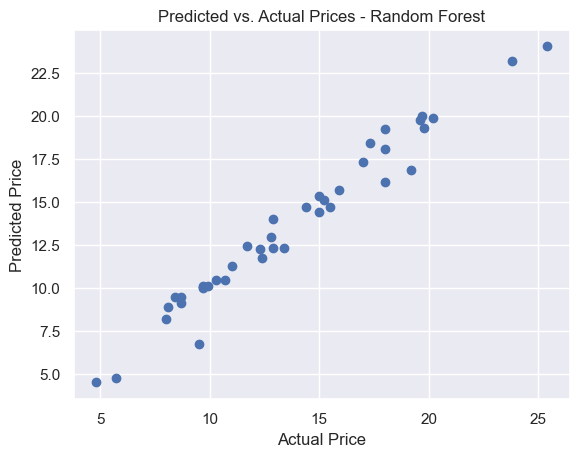

Best Model:RandomForestRegressor()
-------------------------------

Training and evaluating Lasso
--- Lasso ---
Testing Data:
Mean Absolute Error: 1.221186765350707
Root Mean Squared Error: 1.541885828953065
R2 Score: 0.8961656275499381


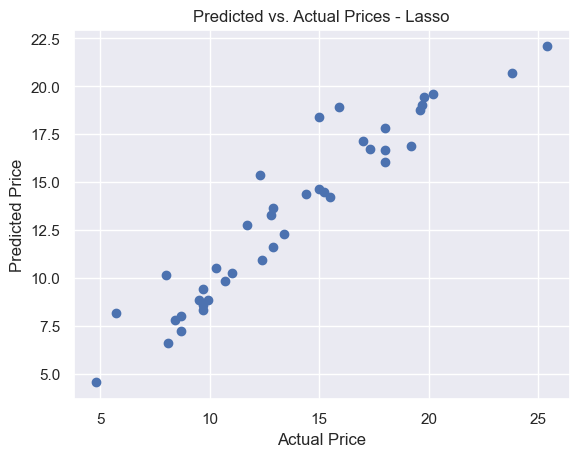

Best Model:Lasso(alpha=10)
-------------------------------

Training and evaluating Ridge
--- Ridge ---
Testing Data:
Mean Absolute Error: 1.2325779888825705
Root Mean Squared Error: 1.530760424567193
R2 Score: 0.897658645668076


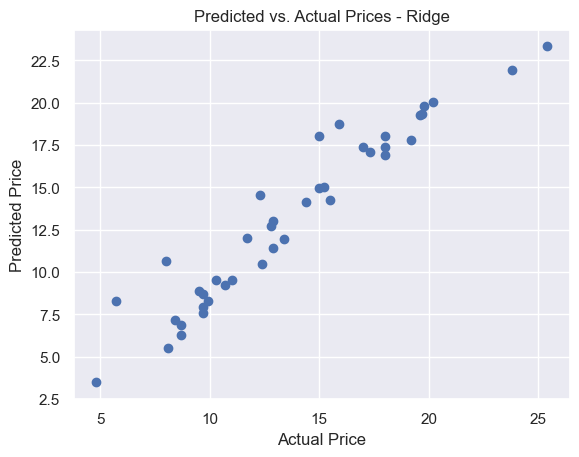

Best Model:Ridge(alpha=10)
-------------------------------

Training and evaluating KNN
--- KNN ---
Testing Data:
Mean Absolute Error: 1.0157337609133386
Root Mean Squared Error: 1.2943203412899529
R2 Score: 0.9268321554154851


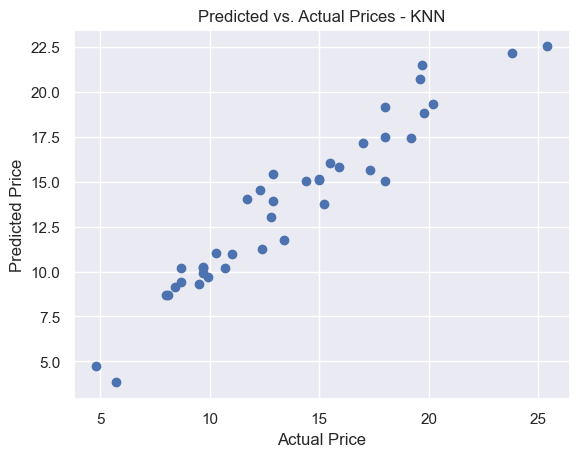

Best Model:KNeighborsRegressor(n_neighbors=3, weights='distance')
-------------------------------

Training and evaluating SVR
--- SVR ---
Testing Data:
Mean Absolute Error: 0.3599474615090122
Root Mean Squared Error: 0.46467058512317166
R2 Score: 0.9905696660747941


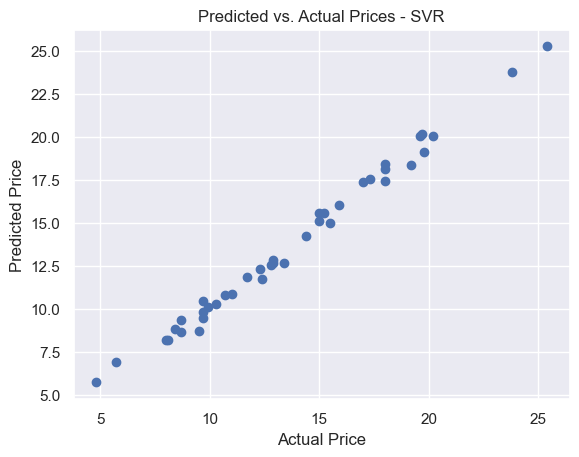

Best Model:SVR(C=10)
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
Mean Absolute Error: 1.3617040742836912
Root Mean Squared Error: 1.6877188724813208
R2 Score: 0.8755952616565528


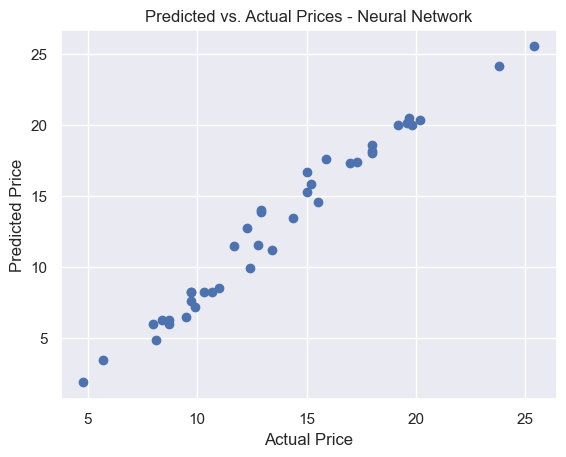

Best Model:MLPRegressor(hidden_layer_sizes=(20, 20, 20))
-------------------------------



In [16]:
models = {
        'Linear Regression': (LinearRegression(), {}),
        'Random Forest': (RandomForestRegressor(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10],'min_samples_leaf': [1,5,10]}),
        'Lasso' : (Lasso(), {'alpha': [0.01, 0.1, 1, 10]}), 
        'Ridge' : (Ridge(), {'alpha': [0.01, 0.1, 1, 10]}),
        'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights':['uniform','distance']}),
        'SVR': (SVR(), {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto', 0.1, 1]}) ,
        'Neural Network': (MLPRegressor(), {'hidden_layer_sizes': [(100,),(50, 50), (20, 20, 20)], 'activation': ['relu', 'tanh'], 'solver': ['adam']})
    }

for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
        grid_search.fit(x_train, y_train)  # Use the scaled features

        best_model = grid_search.best_estimator_

        # Evaluation on testing data
        y_test_pred = best_model.predict(x_test)  # Predict using scaled features
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))   
        test_r2 = r2_score(y_test, y_test_pred)
        
        
        print(f"--- {model_name} ---")
        print("Testing Data:")
        print(f"Mean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")
        print(f"R2 Score: {test_r2}")
        
        # Plot predicted vs. actual prices
        plt.figure()
        plt.scatter(y_test, y_test_pred)
        plt.title(f"Predicted vs. Actual Prices - {model_name}")
        plt.xlabel("Actual Price")
        plt.ylabel("Predicted Price")
        plt.show()   
        
        print(f"Best Model:{best_model}")

        print("-------------------------------\n")

##### The SVR algorithm seems to provide the best balance of accuracy and generalization among the tested algorithms. 